# _Boosted trees_

In tegenstelling tot andere ensemble-methoden die modellen parallel bouwen (zoals _random forests_), bouwen **_boosting_-algoritmes modellen sequentieel. Elk nieuw model in de reeks wordt getraind om de fouten te corrigeren die door zijn voorgangers zijn gemaakt.** Dit iteratieve proces stelt het totale model in staat om zijn nauwkeurigheid te verbeteren door te focussen op moeilijk te voorspellen voorbeelden. Er bestaan verschillende varianten, maar **_Gradient Boosting_** levert tegenwoordig meestal de beste resultaten op[^adaboost].

## _Gradient Boosting_
Bij deze techniek starten we met een eenvoudig initieel model (bv. het gemiddelde van de target bij regressie). Dan wordt iteratief telkens in 3 stappen gewerkt:  
1. De gradient van de _loss_ functie wordt berekend naar iedere input[^math_foundations]. Bij een regressieprobleem met een $L^2$ _loss_ komt dit neer op de negatieve _residuals_:
$$
-2(y_i-f(x_i))
$$
2. Die **gradient vormt de _target_ voor een nieuw model**.
3. De predicties van het nieuwe model worden bij de predicties in de vorige stap geteld - weliswaar gewogen met een _learning rate_ hyper parameter.
Op deze manier worden de predictiefouten stelselmatig kleiner en kleiner.

## _Gradient Boosted Trees_
Hoewel gradient boosting een algemene strategie is binnen ML, wordt de techniek veruit het meest toegepast bij _decision trees_.

### Voordelen
- Accuraatheid: _Gradient Boosting_ is algemeen gesproken een van de meest accurate algoritmes voor (semi-)gestructureerde data. Het doet het vaak beter dan _random forests_ omdat bij die laatste, onafhankelijke _decision trees_ worden getraind. Iedere individuele _tree_ is dan onderhevig aan dezelfde predictiefouten, terwijl bij _gradient boosting_ iedere _tree_ leert uit de fouten van de voorgaande _trees_.
- Gebalanceerd leren: _Trees_ richten zich op de moeilijk te voorspellen gevallen. Wanneer dit samenhangt met _imbalances_ in de data, resulteert dit in een natuurlijke beveiliging tegen _bias_.
- Flexibiliteit: Kan met eender welke _loss_ functie werken zolang die differentieerbaar is.
- Efficiënt: Resulteert vaak in kleinere ensembles

[^adaboost]: Zie bijvoorbeeld ook Adaptive Boosting (AdaBoost).
[^math_foundations]: Hier gaan we dieper op in, in de cursus Mathematical Foundations.

In [1]:
import dtreeviz
import matplotlib
from sklearn.datasets import load_iris
from xgboost import XGBClassifier

from ml_courses.utils import display_dtreeviz

matplotlib.set_loglevel("ERROR")

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

clf = XGBClassifier()
clf = clf.fit(X, y)

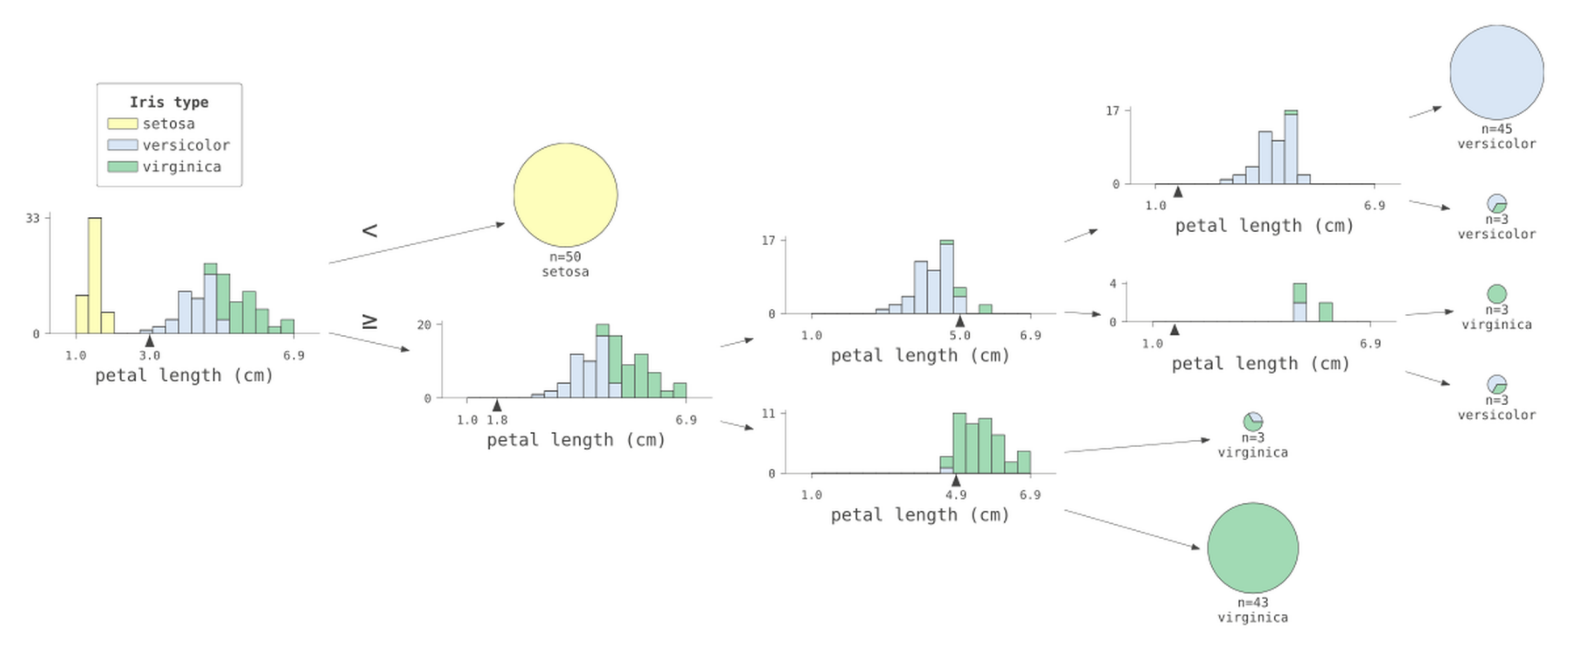

In [3]:
# The first tree in the ensemble
viz_model = dtreeviz.model(
    clf,
    tree_index=1,
    X_train=X,
    y_train=y,
    feature_names=iris.feature_names,
    target_name="Iris type",
    class_names=iris.target_names,
)

display_dtreeviz(viz_model.view(orientation="LR", fontname="DejaVu Sans Mono", scale=1.5))

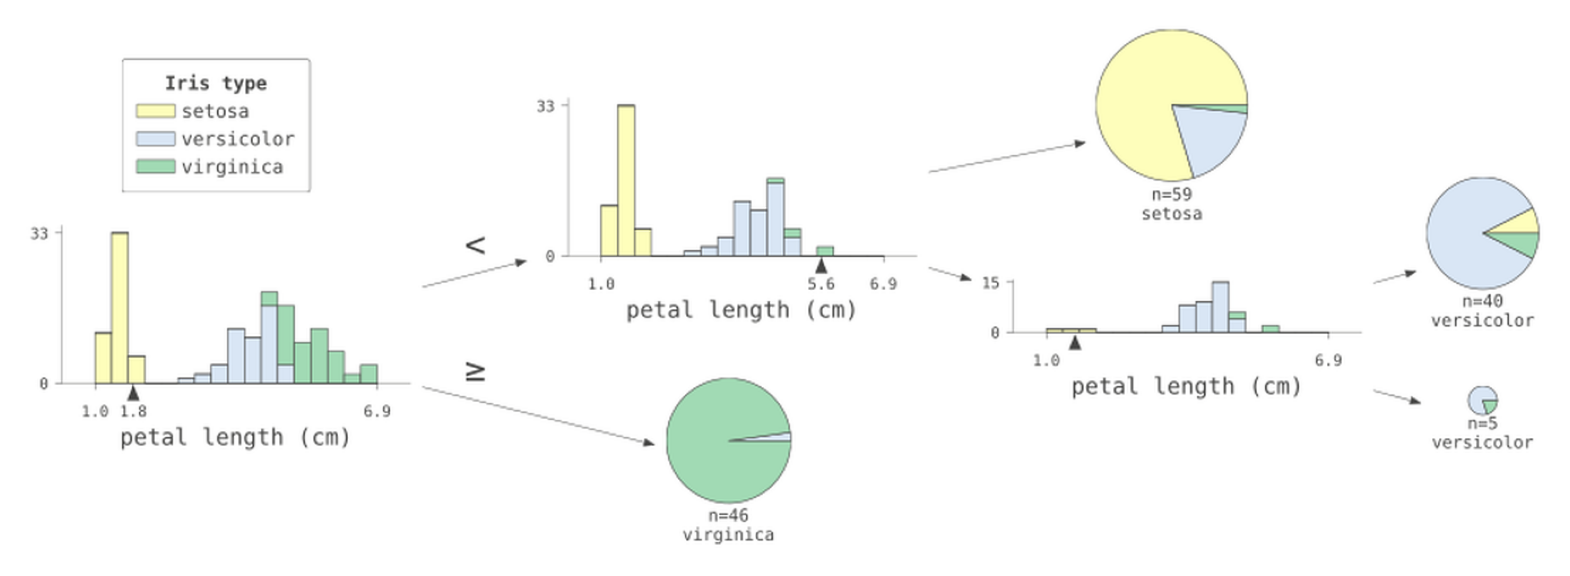

In [4]:
# The 100th tree in the ensemble
viz_model = dtreeviz.model(
    clf,
    tree_index=100,
    X_train=X,
    y_train=y,
    feature_names=iris.feature_names,
    target_name="Iris type",
    class_names=iris.target_names,
)

display_dtreeviz(viz_model.view(orientation="LR", fontname="DejaVu Sans Mono", scale=1.5))